In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
# input = 2, output = 1
W = tf.Variable(tf.random_normal([2,1]), name='weight')
# output = 1
b = tf.Variable(tf.random_normal([1]), name='bias')

### Hypothesis

In [5]:
# sigmoid function 은 우리의 가설 H(X) = 1/(1+e^(-w.transpose * X))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [6]:
# 새롭게 정의된 오차함수
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * (tf.log(1 - hypothesis)))
# 학습 그래프 최적화 알고리즘 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# 예측값 H(X) > 0.5 is true, else false
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
# 0이나 1의 값을 트레이닝 횟수만큼 평균치 계산
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

### Train

In [7]:
sess = tf.InteractiveSession()

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
vcost = []

In [10]:
for step in range(10001):
  cost_val, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
  vcost.append(cost_val)
  if step % 1000 == 0:
    print(step, '\t', cost_val)

0 	 1.7677397
1000 	 0.31692114
2000 	 0.27463448
3000 	 0.24225432
4000 	 0.21638572
5000 	 0.19532116
6000 	 0.17790334
7000 	 0.16330047
8000 	 0.15090385
9000 	 0.14026125
10000 	 0.13103247


Text(0, 0.5, 'cost')

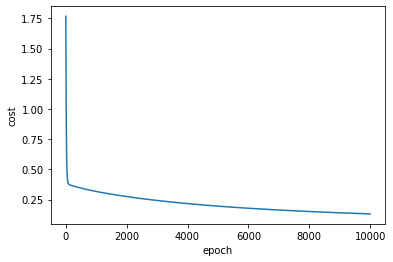

In [11]:
plt.plot(vcost)
plt.xlabel('epoch')
plt.ylabel('cost')

### Test

In [12]:
sess.run(hypothesis,feed_dict={X:[[5,3]]})

array([[0.95016766]], dtype=float32)